<a href="https://colab.research.google.com/github/samartharora25/Employee_Salary_Prediction/blob/main/Employee_Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv("/content/Salary Data.csv")
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [7]:
data.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


🚀 Starting Salary Prediction Model Training Process...

🔄 STEP 1: Loading and cleaning data...
✅ Data loaded successfully: 375 rows, 6 columns
📊 Original dataset shape: (375, 6)
📋 Columns: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
🔍 Missing values per column:
   Age: 2
   Gender: 2
   Education Level: 2
   Job Title: 2
   Years of Experience: 2
   Salary: 2
🧹 After removing missing values: 373 rows
🚫 After removing salary outliers: 372 rows

💰 Salary Statistics:
   Mean: $100,846.77
   Median: $95,000.00
   Min: $30,000.00
   Max: $250,000.00

🔄 STEP 2: Exploring data with visualizations...


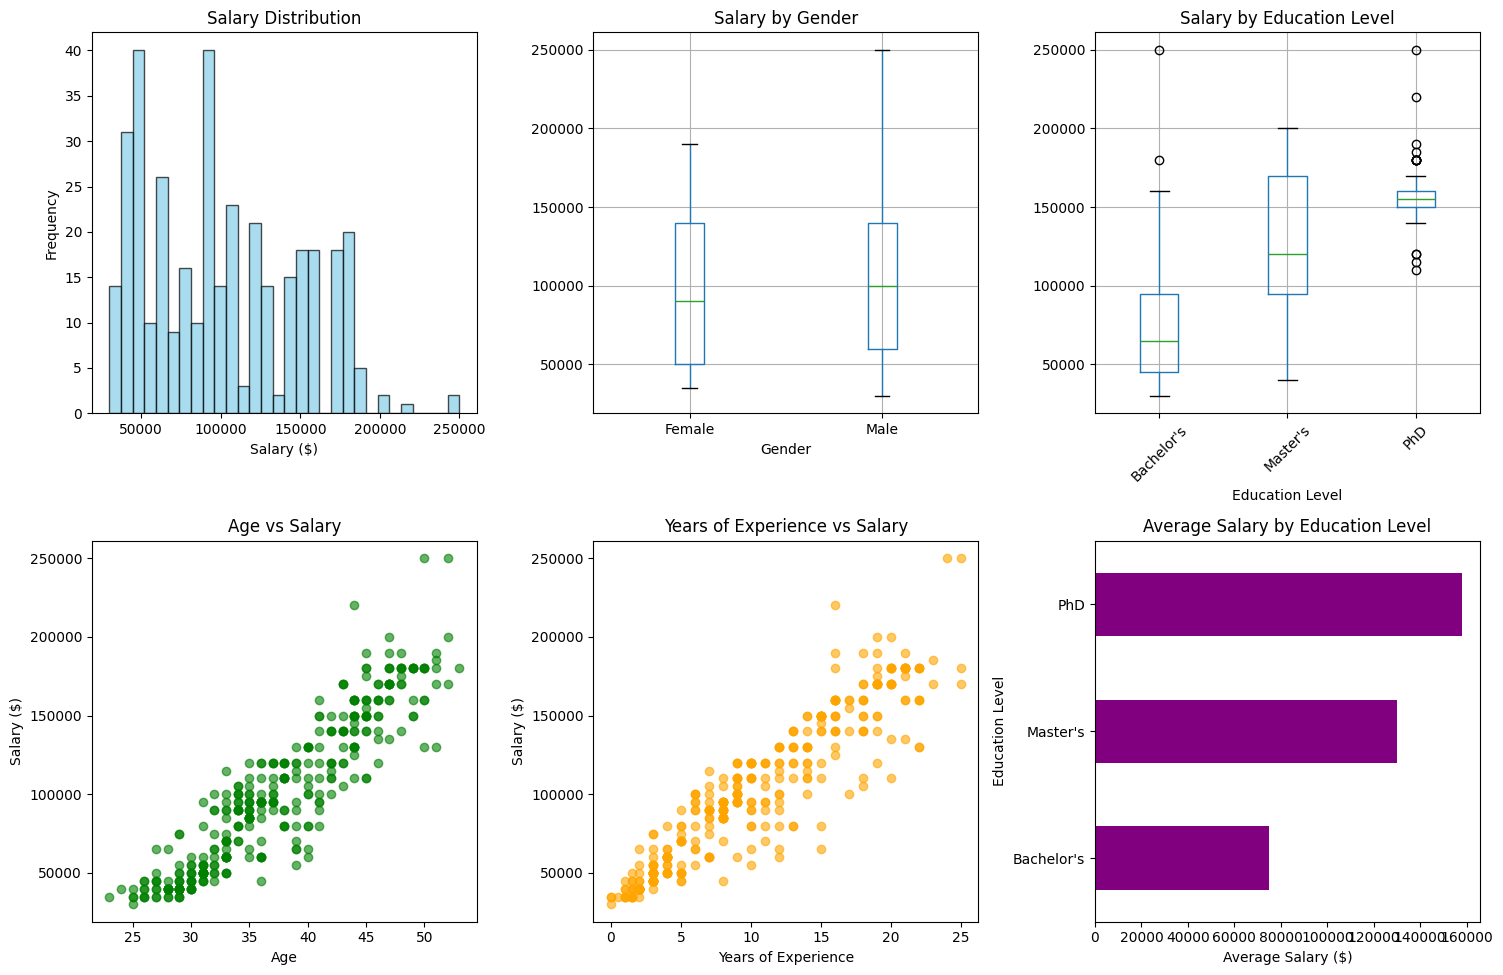

📈 Key Insights:
   👨‍👩‍👧‍👦 Average salary by gender:
      Female: $97,011.17
      Male: $104,404.15
   🎓 Average salary by education:
      PhD: $157,843.14
      Master's: $129,795.92
      Bachelor's: $75,089.69

🔄 STEP 3: Preparing features for machine learning...
🔢 Encoding categorical variables:
   Gender:
      'Male' → 1
      'Female' → 0
   Education Level:
      'Bachelor's' → 0
      'Master's' → 1
      'PhD' → 2
   Job Title:
      'Software Engineer' → 159
      'Data Analyst' → 17
      'Senior Manager' → 130
      'Sales Associate' → 101
      'Director' → 22
      'Marketing Analyst' → 81
      'Product Manager' → 93
      'Sales Manager' → 104
      'Marketing Coordinator' → 82
      'Senior Scientist' → 150
      'Software Developer' → 158
      'HR Manager' → 40
      'Financial Analyst' → 36
      'Project Manager' → 96
      'Customer Service Rep' → 13
      'Operations Manager' → 89
      'Marketing Manager' → 83
      'Senior Engineer' → 116
      'Data Entry 

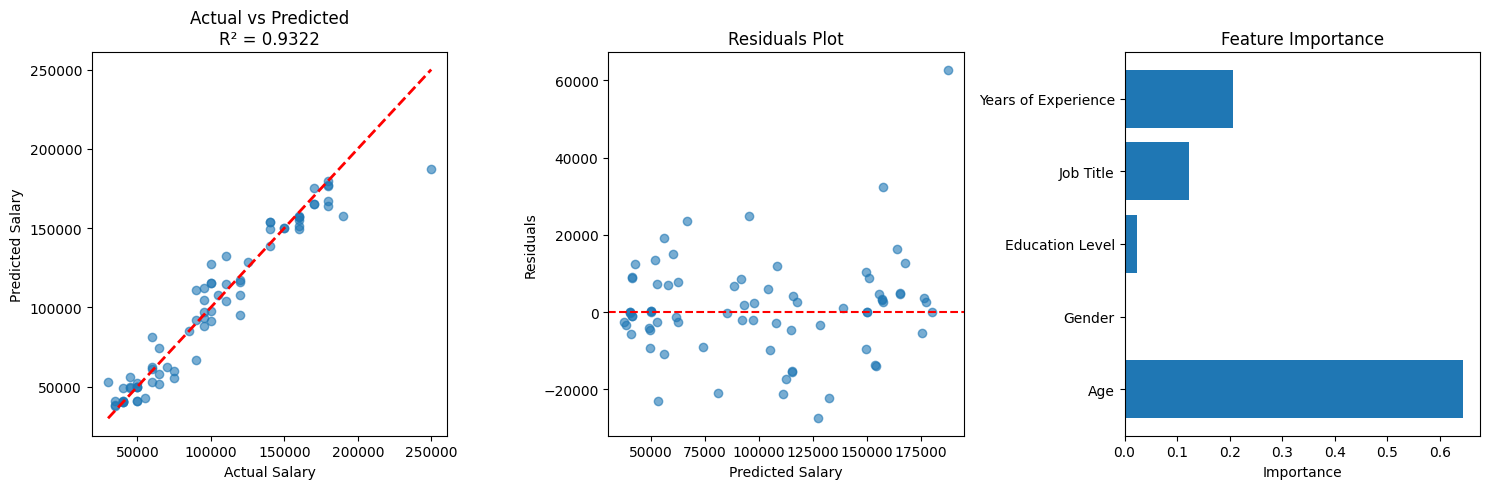


🔄 STEP 7: Saving model and encoders...
✅ Model saved successfully to 'salary_predictor_model.pkl'
✅ Model components saved:
   📁 Complete package: salary_predictor_model.pkl
   🌳 Random Forest model: random_forest_model.pkl
   🔢 Label encoders: label_encoders.pkl

🎉 Training completed successfully!
📊 Final Model Performance: R² = 0.9322

🧪 Testing prediction...
   Sample prediction: $61,908.69


In [8]:
# salary_predictor.py - Simple Random Forest Implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

class SalaryPredictor:
    def __init__(self):
        self.model = None
        self.encoders = {}
        self.feature_names = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']
        self.is_trained = False

    def step1_load_data(self, file_path='Salary Data.csv'):
        """
        STEP 1: Load and clean the data
        - Read CSV file
        - Remove missing values
        - Remove outliers (very low salaries)
        """
        print("🔄 STEP 1: Loading and cleaning data...")

        # Load the CSV file
        try:
            df = pd.read_csv(file_path)
            print(f"✅ Data loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
        except FileNotFoundError:
            print(f"❌ Error: File '{file_path}' not found!")
            return None

        # Display basic info
        print(f"📊 Original dataset shape: {df.shape}")
        print(f"📋 Columns: {list(df.columns)}")

        # Check for missing values
        missing_values = df.isnull().sum()
        print(f"🔍 Missing values per column:")
        for col, missing in missing_values.items():
            if missing > 0:
                print(f"   {col}: {missing}")

        # Remove rows with missing values
        df_clean = df.dropna()
        print(f"🧹 After removing missing values: {df_clean.shape[0]} rows")

        # Remove outlier salaries (very low salaries that might be errors)
        df_clean = df_clean[df_clean['Salary'] > 1000]
        print(f"🚫 After removing salary outliers: {df_clean.shape[0]} rows")

        # Display salary statistics
        print(f"\n💰 Salary Statistics:")
        print(f"   Mean: ${df_clean['Salary'].mean():,.2f}")
        print(f"   Median: ${df_clean['Salary'].median():,.2f}")
        print(f"   Min: ${df_clean['Salary'].min():,.2f}")
        print(f"   Max: ${df_clean['Salary'].max():,.2f}")

        self.original_data = df_clean.copy()
        return df_clean

    def step2_explore_data(self, df):
        """
        STEP 2: Explore the data with visualizations
        - Create plots to understand data distribution
        - Analyze relationships between features and salary
        """
        print("\n🔄 STEP 2: Exploring data with visualizations...")

        # Create visualization plots
        plt.figure(figsize=(15, 10))

        # 1. Salary distribution
        plt.subplot(2, 3, 1)
        plt.hist(df['Salary'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title('Salary Distribution')
        plt.xlabel('Salary ($)')
        plt.ylabel('Frequency')
        plt.ticklabel_format(style='plain', axis='x')

        # 2. Salary by Gender
        plt.subplot(2, 3, 2)
        df.boxplot(column='Salary', by='Gender', ax=plt.gca())
        plt.title('Salary by Gender')
        plt.suptitle('')  # Remove automatic title

        # 3. Salary by Education Level
        plt.subplot(2, 3, 3)
        df.boxplot(column='Salary', by='Education Level', ax=plt.gca())
        plt.title('Salary by Education Level')
        plt.suptitle('')
        plt.xticks(rotation=45)

        # 4. Age vs Salary
        plt.subplot(2, 3, 4)
        plt.scatter(df['Age'], df['Salary'], alpha=0.6, color='green')
        plt.title('Age vs Salary')
        plt.xlabel('Age')
        plt.ylabel('Salary ($)')

        # 5. Experience vs Salary
        plt.subplot(2, 3, 5)
        plt.scatter(df['Years of Experience'], df['Salary'], alpha=0.6, color='orange')
        plt.title('Years of Experience vs Salary')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary ($)')

        # 6. Average salary by education
        plt.subplot(2, 3, 6)
        edu_salary = df.groupby('Education Level')['Salary'].mean().sort_values(ascending=True)
        edu_salary.plot(kind='barh', color='purple')
        plt.title('Average Salary by Education Level')
        plt.xlabel('Average Salary ($)')

        plt.tight_layout()
        plt.savefig('data_exploration.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Print insights
        print("📈 Key Insights:")
        print(f"   👨‍👩‍👧‍👦 Average salary by gender:")
        for gender, avg_salary in df.groupby('Gender')['Salary'].mean().items():
            print(f"      {gender}: ${avg_salary:,.2f}")

        print(f"   🎓 Average salary by education:")
        for edu, avg_salary in df.groupby('Education Level')['Salary'].mean().sort_values(ascending=False).head(3).items():
            print(f"      {edu}: ${avg_salary:,.2f}")

    def step3_prepare_features(self, df):
        """
        STEP 3: Prepare features for machine learning
        - Convert categorical variables to numbers using Label Encoding
        - Create feature matrix (X) and target vector (y)
        """
        print("\n🔄 STEP 3: Preparing features for machine learning...")

        # Make a copy to avoid modifying original data
        data = df.copy()

        # Initialize and fit label encoders for categorical variables
        categorical_columns = ['Gender', 'Education Level', 'Job Title']

        print("🔢 Encoding categorical variables:")
        for column in categorical_columns:
            self.encoders[column] = LabelEncoder()
            data[f'{column}_Encoded'] = self.encoders[column].fit_transform(data[column])

            # Show encoding mapping
            unique_values = data[column].unique()
            encoded_values = self.encoders[column].transform(unique_values)
            print(f"   {column}:")
            for orig, encoded in zip(unique_values, encoded_values):
                print(f"      '{orig}' → {encoded}")

        # Create feature matrix (X) with numerical features
        feature_columns = ['Age', 'Gender_Encoded', 'Education Level_Encoded',
                          'Job Title_Encoded', 'Years of Experience']

        X = data[feature_columns]
        y = data['Salary']

        print(f"\n📊 Feature matrix shape: {X.shape}")
        print(f"📊 Target vector shape: {y.shape}")
        print(f"📋 Features used: {feature_columns}")

        return X, y

    def step4_split_data(self, X, y, test_size=0.2, random_state=42):
        """
        STEP 4: Split data into training and testing sets
        - 80% for training the model
        - 20% for testing the model performance
        """
        print(f"\n🔄 STEP 4: Splitting data into train/test sets...")

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        print(f"📊 Training set: {X_train.shape[0]} samples")
        print(f"📊 Testing set: {X_test.shape[0]} samples")
        print(f"📊 Split ratio: {(1-test_size)*100:.0f}% train, {test_size*100:.0f}% test")

        return X_train, X_test, y_train, y_test

    def step5_train_model(self, X_train, y_train):
        """
        STEP 5: Train Random Forest model
        - Random Forest combines multiple decision trees
        - Each tree is trained on a random subset of data
        - Final prediction is the average of all trees
        """
        print(f"\n🔄 STEP 5: Training Random Forest model...")

        # Initialize Random Forest with specific parameters
        self.model = RandomForestRegressor(
            n_estimators=100,        # Number of trees in the forest
            max_depth=10,           # Maximum depth of each tree
            min_samples_split=5,    # Minimum samples required to split a node
            min_samples_leaf=2,     # Minimum samples required at a leaf node
            random_state=42,        # For reproducible results
            n_jobs=-1              # Use all available processors
        )

        print("🌳 Random Forest Parameters:")
        print(f"   🌲 Number of trees: {self.model.n_estimators}")
        print(f"   📏 Maximum depth: {self.model.max_depth}")
        print(f"   🔀 Min samples to split: {self.model.min_samples_split}")
        print(f"   🍃 Min samples per leaf: {self.model.min_samples_leaf}")

        # Train the model
        print("🎯 Training model...")
        self.model.fit(X_train, y_train)

        print("✅ Model training completed!")
        self.is_trained = True

        # Show feature importance
        feature_importance = self.model.feature_importances_
        feature_names = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']

        print(f"\n🌟 Feature Importance (how much each feature contributes):")
        for name, importance in zip(feature_names, feature_importance):
            print(f"   {name}: {importance:.4f} ({importance*100:.1f}%)")

        return self.model

    def step6_evaluate_model(self, X_test, y_test):
        """
        STEP 6: Evaluate model performance
        - Make predictions on test data
        - Calculate performance metrics
        - Create visualizations to assess accuracy
        """
        print(f"\n🔄 STEP 6: Evaluating model performance...")

        # Make predictions
        y_pred = self.model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"📊 Performance Metrics:")
        print(f"   🎯 R² Score: {r2:.4f} ({r2*100:.1f}% of variance explained)")
        print(f"   📏 RMSE: ${rmse:.2f} (average prediction error)")
        print(f"   📏 MAE: ${mae:.2f} (mean absolute error)")
        print(f"   📏 MSE: ${mse:.2f} (mean squared error)")

        # Interpretation of R² score
        if r2 >= 0.9:
            print("   🏆 Excellent model performance!")
        elif r2 >= 0.8:
            print("   👍 Good model performance!")
        elif r2 >= 0.7:
            print("   👌 Decent model performance!")
        else:
            print("   ⚠️ Model needs improvement!")

        # Create evaluation plots
        plt.figure(figsize=(15, 5))

        # 1. Actual vs Predicted scatter plot
        plt.subplot(1, 3, 1)
        plt.scatter(y_test, y_pred, alpha=0.6)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Salary')
        plt.ylabel('Predicted Salary')
        plt.title(f'Actual vs Predicted\nR² = {r2:.4f}')

        # 2. Residuals plot
        plt.subplot(1, 3, 2)
        residuals = y_test - y_pred
        plt.scatter(y_pred, residuals, alpha=0.6)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted Salary')
        plt.ylabel('Residuals')
        plt.title('Residuals Plot')

        # 3. Feature importance
        plt.subplot(1, 3, 3)
        feature_names = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']
        importance = self.model.feature_importances_
        plt.barh(feature_names, importance)
        plt.xlabel('Importance')
        plt.title('Feature Importance')

        plt.tight_layout()
        plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
        plt.show()

        return {
            'r2': r2, 'rmse': rmse, 'mae': mae, 'mse': mse,
            'y_test': y_test, 'y_pred': y_pred
        }

    def step7_save_model(self, model_path='salary_predictor_model.pkl'):
        """
        STEP 7: Save the trained model and encoders
        - Save the Random Forest model
        - Save the label encoders for categorical variables
        - These will be used later in the Streamlit app
        """
        print(f"\n🔄 STEP 7: Saving model and encoders...")

        if not self.is_trained:
            print("❌ Error: Model is not trained yet!")
            return False

        try:
            # Create a dictionary with all necessary components
            model_package = {
                'model': self.model,
                'encoders': self.encoders,
                'feature_names': self.feature_names
            }

            # Save everything
            joblib.dump(model_package, model_path)
            print(f"✅ Model saved successfully to '{model_path}'")

            # Also save components separately for easier access
            joblib.dump(self.model, 'random_forest_model.pkl')
            joblib.dump(self.encoders, 'label_encoders.pkl')

            print(f"✅ Model components saved:")
            print(f"   📁 Complete package: {model_path}")
            print(f"   🌳 Random Forest model: random_forest_model.pkl")
            print(f"   🔢 Label encoders: label_encoders.pkl")

            return True

        except Exception as e:
            print(f"❌ Error saving model: {str(e)}")
            return False

    def predict_salary(self, age, gender, education, job_title, experience):
        """
        Make a salary prediction for new employee data
        """
        if not self.is_trained:
            print("❌ Error: Model is not trained yet!")
            return None

        try:
            # Encode categorical variables
            gender_encoded = self.encoders['Gender'].transform([gender])[0]
            education_encoded = self.encoders['Education Level'].transform([education])[0]
            job_title_encoded = self.encoders['Job Title'].transform([job_title])[0]

            # Create feature array
            features = np.array([[age, gender_encoded, education_encoded, job_title_encoded, experience]])

            # Make prediction
            prediction = self.model.predict(features)[0]

            return max(0, prediction)  # Ensure non-negative prediction

        except Exception as e:
            print(f"❌ Error making prediction: {str(e)}")
            return None

def main():
    """
    Main function to run all steps
    """
    print("🚀 Starting Salary Prediction Model Training Process...\n")

    # Initialize predictor
    predictor = SalaryPredictor()

    # Step 1: Load data
    df = predictor.step1_load_data('Salary Data.csv')
    if df is None:
        return

    # Step 2: Explore data
    predictor.step2_explore_data(df)

    # Step 3: Prepare features
    X, y = predictor.step3_prepare_features(df)

    # Step 4: Split data
    X_train, X_test, y_train, y_test = predictor.step4_split_data(X, y)

    # Step 5: Train model
    model = predictor.step5_train_model(X_train, y_train)

    # Step 6: Evaluate model
    results = predictor.step6_evaluate_model(X_test, y_test)

    # Step 7: Save model
    success = predictor.step7_save_model()

    if success:
        print(f"\n🎉 Training completed successfully!")
        print(f"📊 Final Model Performance: R² = {results['r2']:.4f}")


        # Test prediction
        print(f"\n🧪 Testing prediction...")
        sample_prediction = predictor.predict_salary(
            age=30, gender='Male', education="Bachelor's",
            job_title='Software Engineer', experience=5
        )
        if sample_prediction:
            print(f"   Sample prediction: ${sample_prediction:,.2f}")

    else:
        print(f"\n❌ Training failed!")

if __name__ == "__main__":
    main()

In [9]:
import pickle


In [10]:
import joblib

# Load the saved model package
model_package_path = 'salary_predictor_model.pkl'
try:
    loaded_model_package = joblib.load(model_package_path)
    print(f"✅ Model package loaded successfully from '{model_package_path}'")

    # You can access the model and encoders like this:
    loaded_model = loaded_model_package['model']
    loaded_encoders = loaded_model_package['encoders']
    loaded_feature_names = loaded_model_package['feature_names']

    print("🔑 Accessing loaded components:")
    print(f"   🌳 Loaded model type: {type(loaded_model)}")
    print(f"   🔢 Loaded encoders type: {type(loaded_encoders)}")
    print(f"   📋 Loaded feature names: {loaded_feature_names}")

except FileNotFoundError:
    print(f"❌ Error: Model file '{model_package_path}' not found!")
except Exception as e:
    print(f"❌ Error loading model: {str(e)}")

✅ Model package loaded successfully from 'salary_predictor_model.pkl'
🔑 Accessing loaded components:
   🌳 Loaded model type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
   🔢 Loaded encoders type: <class 'dict'>
   📋 Loaded feature names: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']


In [11]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.6 MB/s eta 0:00:00


In [12]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load the trained model and encoders
model_package_path = 'salary_predictor_model.pkl'

@st.cache_resource
def load_model_package(path):
    """Loads the model package including model and encoders."""
    try:
        model_package = joblib.load(path)
        return model_package
    except FileNotFoundError:
        st.error(f"Error: Model file not found at {path}")
        return None
    except Exception as e:
        st.error(f"Error loading model: {e}")
        return None

loaded_model_package = load_model_package(model_package_path)

if loaded_model_package:
    loaded_model = loaded_model_package['model']
    loaded_encoders = loaded_model_package['encoders']
    loaded_feature_names = loaded_model_package['feature_names']
    st.success("Model and encoders loaded successfully!")
else:
    st.stop() # Stop the app if model loading fails

2025-07-30 17:39:08.420 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 17:39:08.522 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-30 17:39:08.523 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 17:39:08.526 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 17:39:08.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 17:39:08.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 17:39:08.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 17:39:08.554 Thread 'MainThread': mi

In [13]:
!ngrok authtoken 30bKSW666LiRpCXkVRt0Jku8Dvc_hYMshcWQxSXvM1hKdfpR

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [14]:
!pip install pyngrok &>/dev/null
from pyngrok import ngrok

# Terminate any running ngrok tunnels
ngrok.kill()

# Open a new ngrok tunnel to the Streamlit port (default is 8501)
ngrok_tunnel = ngrok.connect(8501)
print("Streamlit App URL:", ngrok_tunnel.public_url)

Streamlit App URL: https://8316a2c86dbe.ngrok-free.app


In [15]:
!ngrok http 8501

ERROR:  authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.
ERROR:  You can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.
ERROR:  Read more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config
ERROR:  You can view your current agent sessions in the dashboard:
ERROR:  https://dashboard.ngrok.com/agents
ERROR:  
ERROR:  ERR_NGROK_108
ERROR:  https://ngrok.com/docs/errors/err_ngrok_108
ERROR:  


In [19]:
!streamlit run /content/app.py &>/dev/null&

In [ ]:
from pyngrok import ngrok
import time

# Terminate any running ngrok tunnels
ngrok.kill()

# Open a new ngrok tunnel to the Streamlit port (default is 8501)
print("Opening ngrok tunnel...")
ngrok_tunnel = ngrok.connect(8501)
print("Streamlit App URL:", ngrok_tunnel.public_url)

# Keep the cell running to keep the tunnel active
try:
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    print("Tunnel stopped.")
    ngrok.disconnect(ngrok_tunnel.public_url)

Opening ngrok tunnel...
Streamlit App URL: https://1711b6b91433.ngrok-free.app
